In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
salary = pd.read_csv('RealEstate.csv')

X = salary['X2 house age'].values
y = salary['Y house price of unit area'].values

split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(m, b, X_batch, y_batch):
    n = len(y_batch)
    y_pred = m * X_batch + b
    error = y_batch - y_pred
    dm = -2 * np.sum(error * X_batch)  / n
    db = -2 * np.sum(error) / n

    return dm, db

def train(X, y, learning_rate=0.0001, epochs=10000):
    m, b = 0, 0

    for i in range(epochs):
        dm, db = compute_gradients(m, b, X, y) 
        m -= learning_rate * dm
        b -= learning_rate * db

        if i % (epochs // 20) == 0:
            print(mean_squared_error(y, m * X + b))
    
    return m, b


m_final, b_final = train(X_train, y_train, epochs=100000, learning_rate=0.0002)

y_pred = m_final * X_test + b_final
test_mse = mean_squared_error(y_test, y_pred)

print("Trained model parameters:")
print(f"m = {m_final:.4f}, b = {b_final:.4f}")
print(f"Test MSE = {test_mse:.4f}")

1327.786445054479
351.08583160403697
236.98082056511367
200.1074130016845
188.19165073183046
184.34103317695931
183.09669351843877
182.69458108745772
182.5646371400458
182.52264532838302
182.50907553708575
182.5046904146402
182.50327334797788
182.50281541825063
182.50266743676133
182.502619616059
182.50260416264263
182.50259916882058
182.50259755505064
182.50259703355562
Trained model parameters:
m = -0.2858, b = 43.0085
Test MSE = 153.3310


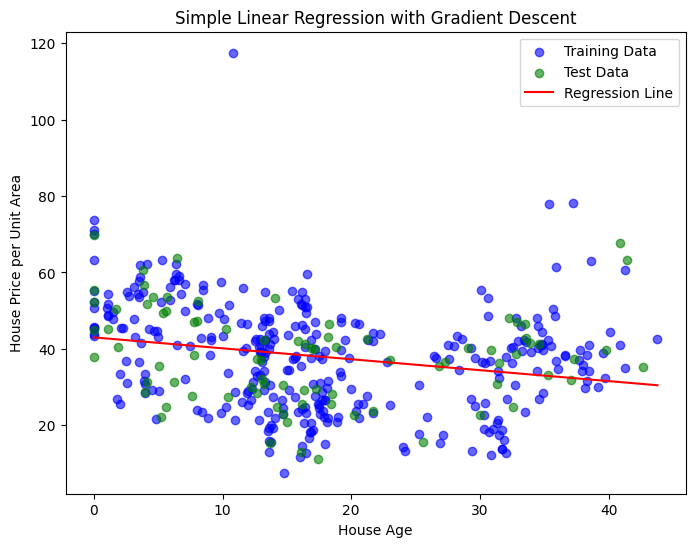

In [40]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test Data')

X_line = np.linspace(X.min(), X.max(), 100)
y_line = m_final * X_line + b_final
plt.plot(X_line, y_line, color='red', label='Regression Line')

plt.xlabel('House Age')
plt.ylabel('House Price per Unit Area')
plt.title('Simple Linear Regression with Gradient Descent')
plt.legend()
plt.show()